## MNIST Digits Generation using DCGAN

*   Objective - Generating new MNIST images to augment the size of the dataset.



## Pipeline
Steps Involved


1. Importing Libraries
2. Data Loading and Visualization
3. Data Preprocessing
4. Model Building
5. Model Training
6. Generating a GIF of Generated Images



### Importing the libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import glob
import imageio
from IPython import display
from skimage.transform import resize
import numpy as np
import os
from keras.utils import plot_model

### Data Loading and Visualization
1. Data Loading
2. Data Visualization

#### Load the MNIST Data

In [3]:
# (train_images,train_labels),(_,_) = tf.keras.datasets.mnist.load_data()
# (train_images,train_labels),(_,_) = tf.keras.datasets.mnist.load_data()
# (train_images,train_labels),(_,_) = tf.keras.datasets.mnist.load_data()
(train_images,train_labels),(_,_) = tf.keras.datasets.mnist.load_data()

In [5]:
len(train_images), train_images.shape

(60000, (60000, 28, 28))

#### Visualize a sample image

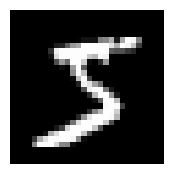

In [7]:
plt.figure(figsize=(2,2))
plt.imshow(train_images[0],cmap='gray')
plt.axis('off')
plt.show()

### Data Preprocessing


1.   Normalization of Images
2.   Resize Images
1.   Reshape Images
2.   Shuffle Data

In [8]:
BUFFER_SIZE=60000
BATCH_SIZE = 2048
NOISE_DIM = 100

#### Normalization of Images between [-1,1]

In [9]:
train_dataset = (train_images/127.5)-1.0

#### Resize Images to size (32, 32)

In [14]:
# from skimage.transform import resize
# from skimage.transfrom import resize
# from skimage.transform import resize
# from skimage.transform import resize
# from skimage.transform import resize
# from skimage.transform import resize
# train_images = np.zeros((BUFFER_SIZE,32,32))
# for index,img in enumerate(train_dataset):
#     train_images[index,:,:] = resize(image = img,output_shape=(32,32))


# train_images = np.zeros((BUFFER_SIZE,32,32))
# for index,img in enumerate(train_dataset):
#     train_images[index,:,:] = resize(image = img,output_shape=(32,32))

# train_images = np.zeros((BUFFER_SIZE,32,32))
# for index,img in enumerate(train_dataset):
#     train_images[index,:,:] = resize(image =img,output_shape=(32,32))


train_images = np.zeros((BUFFER_SIZE,32,32))
for index,img in enumerate(train_dataset):
    train_images[index,:,:] = resize(image=img,output_shape=(32,32))

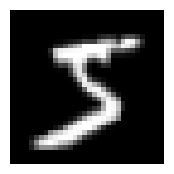

In [15]:
plt.figure(figsize=(2,2))
plt.imshow(train_images[0],cmap='gray')
plt.axis('off')
plt.show()

#### Reshape the image to add a channel dimension

In [25]:
# train_images.reshape(train_images[0],
#                     32,32,1).astype('float32')
train_images = train_images.reshape(train_images.shape[0],32,32,1).astype('float32')

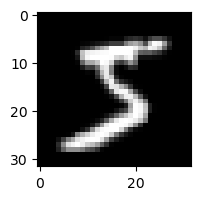

In [26]:
plt.figure(figsize=(2,2))
plt.imshow(train_images[0],cmap='gray')
plt.show()

In [27]:
train_images.shape

(60000, 32, 32, 1)

#### Shuffle the data

In [33]:
# train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE,seed=42).batch(BATCH_SIZE)
# tf.data.Datasets.from_tensor_slices(train_images).shuffle(BUFFER_SIZE,seed=42).batch(BATCH_SIZE)
# tf.data.Datasets.from_tensor_slices(train_images).shuffLe(BUFFER_SIZE,seed=42).batch(BATCH_SIZE)
# tf.data.Datasets.from_tensor_slices(train_images).shuffle(BUFFER_SIZE,seed=42).batch(BATCH_SIZE)
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE,seed=42).batch(BATCH_SIZE)

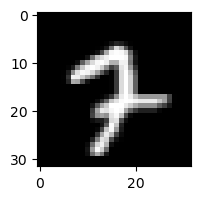

In [44]:
sample = next(iter(train_dataset))
plt.figure(figsize=(2,2))
plt.imshow(sample[0].numpy()[:,:,0],cmap='gray')
plt.show()

### Model Building
1.   Generator Model Building
2.   Discriminator Model Building

In [52]:
def make_generator():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(4*4*128,use_bias=False,input_shape=(NOISE_DIM,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Reshape((4,4,128)))

    model.add(tf.keras.layers.Conv2DTranspose(128,(3,3),strides=(2,2),use_bias=False,padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(64,(3,3),strides=(2,2),use_bias=False,padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(1,(3,3),strides=(2,2),use_bias=False,padding='same'))

    return model

In [54]:
generator = make_generator()
generator.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2048)              204800    
                                                                 
 batch_normalization_6 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 2048)              0         
                                                                 
 reshape_2 (Reshape)         (None, 4, 4, 128)         0         
                                                                 
 conv2d_transpose_4 (Conv2D  (None, 8, 8, 128)         147456    
 Transpose)                                                      
                                                                 
 batch_normalization_7 (Bat  (None, 8, 8, 128)        

#### Generate Imaeg through a Raw Model

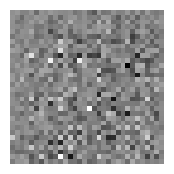

In [59]:
constant_noise = tf.random.normal([1,NOISE_DIM])
generated_image = generator(constant_noise,training=False)

plt.figure(figsize=(2,2))
plt.imshow(generated_image[0,:,:,0],cmap='gray')
plt.axis('off')
plt.show()

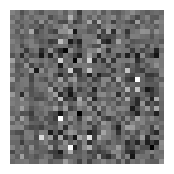

In [60]:
constant_noise = tf.random.normal([1,NOISE_DIM])
generated_image = generator(constant_noise,training=False)
plt.figure(figsize=(2,2))
plt.imshow(generated_image[0,:,:,0],cmap='gray')
plt.axis('off')
plt.show()

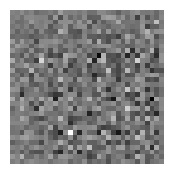

In [61]:
constant_noise = tf.random.normal([1,NOISE_DIM])
generated_image = generator(constant_noise,training=False)
plt.figure(figsize=(2,2))
plt.imshow(generated_image[0,:,:,0],cmap='gray')
plt.axis('off')
plt.show()

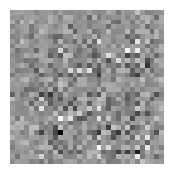

In [62]:
constant_noise = tf.random.normal([1,NOISE_DIM])
generated_image = generator(constant_noise,training=False)
plt.figure(figsize=(2,2))
plt.imshow(generated_image[0,:,:,0],cmap='gray')
plt.axis('off')
plt.show()

#### Discriminator Model Building using Convolutional Layers

In [71]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(16,(3,3),strides=(1,1),use_bias=False,input_shape=[32,32,1]))
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2D(32,(3,3),strides=(1,1),use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2D(64,(3,3),strides=(1,1),use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2D(128,(3,3),strides=(1,1),use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2D(256,(5,5),strides=(2,2),use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2D(1,(10,10),strides=(1,1)))

    model.add(tf.keras.layers.Flatten())
    return model

In [72]:
discriminator= make_discriminator_model()
discriminator.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 16)        144       
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 30, 30, 16)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        4608      
                                                                 
 batch_normalization_17 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 26, 26, 64)        18432     
                                                      

In [73]:
decision = discriminator(generated_image)
print(decision)

tf.Tensor([[0.00204866]], shape=(1, 1), dtype=float32)


### Model Training


1.   Loss Type
2.   Discriminator Loss
3.   Generator Loss
4.   Optimizer
5.   Checkpoint Initialization
6.   Training Flow



#### Declare Binary Cross Entropy Loss

In [74]:
# cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
# cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
# cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
# cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
# cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

#### Discriminator Loss
1. Loss on Real Data
2. Loss on Fake Data

In [75]:
def discriminator_loss(real_output,fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output),real_output)
    fake_loss = cross_entropy(tf.zero_like(fake_output),fake_output)
    total_loss = real_loss+fake_loss
    return total_loss

In [76]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output),real_output)
    fake_loss = cross_entropy(tf.zero_like(fake_output),fake_output)
    total_loss = real_loss+fake_loss
    return total_loss

In [77]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output),real_output)
    fake_loss = cross_entropy(tf.zero_like(fake_output),fake_output)
    total_loss = real_loss+fake_loss
    return total_loss

#### Generator Loss

In [78]:
def generator_loss(fake_output):
    return cross_entropy(tf.zero_like(fake_output),fake_output)

#### Using Adam Optimizer

In [79]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)
# tf.keras.optimizers.Adam(1e-4)
# tf.keras.optimizers.Adam(1e-4)
# tf.keras.optimizers.Adam(1e-4)
# tf.keras.optimizers.Adam(1e-4)
# tf.keras.optimizers.Adam(1e-4)

In [80]:
EPOCHS=250

#### Checkpoint Initialization

In [81]:
# Directory to keep Generated Images each epoch
# if not os.path.isdir('generated_images'):
#     os.makedir('generated_images')

# if not os.path.isdir('generated_images'):
#     os.makedir('generated_images')
# if not os.path.isdir('generated_images'):
#     os.makedir('generated_images')

# if not os.path.isdir('generated_images'):
#     os.makdir('generated_images')

if not os.path.isdir('generated_images'):
    os.makedir('generated_images')

# Directory to save checkpoints
checkpoint_dir = './training_checkpoints'
ckpt = tf.train.Checkpoint(
    generator_optimizer = generator_optimizer,
    discriminator_optimizer  = discriminator_optimizer,
    generator =generator,
    discriminator = discriminator
)
ckpt_manager = tf.train.CheckpointManager(ckpt = ckpt, checkpoint_dir=checkpoint_dir,max_to_keep=3)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.laters_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print('Latest checkpoint restored!!')

TypeError: CheckpointManager.__init__() got an unexpected keyword argument 'ckpt'

In [ ]:
if not os.path.isdir('generated_images'):
    os.mkdir('generated_images')

checkpoint_dir = './training_checkpoints'
ckpt = tf.train.Checkpoint(generator_optimizer = generator_optimizer,
                          discriminator_optimizer = discriminator_optimizer,
                          generator = generator,
                          discriminator = discriminator
                    )
ckpt_manager = tf.train.CheckpointManager(ckpt = ckpt,checkpoint_dir = checkpoint_dir,max_to_keep=3)

if ckpt_mangaer.latest_checkpoint:
    ckpt.resotre(ckpt_mangaer.latest_checkpoint)
    print('Latest Checkpoint Restored!!')

In [ ]:
if not os.path.isdir('generated_images'):
    os.mkdir('generated_images')

checkpoint_dir = './training_checkpoints'
ckpt = tf.train.Checkpoint(generator_optimizer = generator_optimizer,
                          discriminator_optimizer = discriminator_optimizer,
                          generator = generator,
                          discriminator = discriminator)
ckpt_manager = tf.train.CheckpointManager(ckpt =ckpt,checkpoint_dir= checkpoint_dir,max_to_keep=3)

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print('Latest Checkpoint Restored !!')

#### Training Flow
Below Function performs one Flow of Batch Training

In [83]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE,NOISE_DIM])
    with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
        generated_images = generator(noise,training=True)
        real_output = discriminator(images,training=True)
        fake_output  = discriminator(generated_images,training=True)
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output,fake_output)
    gradients_of_generator = gen_tape.gradient(gen_loss,generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss,discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator,generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator,discriminator.trainable_variables))

In [87]:
@tf.function
def train_step(images):
    noise =tf.random.normal([BATCH_SIZE,NOISE_DIM])

    with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
        generated_images = generator(noise,training=True)
        real_output = discriminator(images,training=True)
        fake_output = discriminator(generated_images,training=True)
        gen_loss  = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output,fake_output)
    gradients_of_generator = gen_tape.gradient(gen_loss,generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradients(disc_loss,discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator,generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator,discriminator.trainables_variables))

In [82]:
generator.trainable_variables

[<tf.Variable 'dense_4/kernel:0' shape=(100, 2048) dtype=float32, numpy=
 array([[ 0.01023181,  0.0419425 ,  0.02215097, ..., -0.04746813,
          0.01210744,  0.01686303],
        [ 0.00179094, -0.004828  , -0.05143032, ...,  0.04510116,
          0.04224983, -0.03646252],
        [ 0.04652962,  0.01839482,  0.00474473, ..., -0.04484898,
         -0.05199914,  0.03827439],
        ...,
        [ 0.02723816,  0.03188342, -0.05115464, ..., -0.04592038,
         -0.03702199, -0.03044432],
        [ 0.0215205 ,  0.04780633,  0.01852464, ..., -0.04440755,
          0.02259361,  0.03849493],
        [ 0.0227945 , -0.00201157,  0.0183969 , ..., -0.03719511,
         -0.04736692,  0.0404569 ]], dtype=float32)>,
 <tf.Variable 'batch_normalization_6/gamma:0' shape=(2048,) dtype=float32, numpy=array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)>,
 <tf.Variable 'batch_normalization_6/beta:0' shape=(2048,) dtype=float32, numpy=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)>,
 <tf.Variable '

#### Train the DCGAN Model for Several Epochs

In [85]:
num_examples_to_generaete = 16
seed = tf.random.normal([num_examples_to_generaete,NOISE_DIM])

In [88]:
for epoch in range(1,EPOCHS+1):
    for image_batch in train_dataset:
        train_step(image_batch)

        display.clear_output(wait=True)
        predictions = generator(seed,training=False)
        fig = plt.figure(figsize=(4,4))
        for i in range(predictions.shape[0]):
            plt.subplot(4,4,i)
            plt.imshow(predictions[i,:,:,0]*127.5+127.5,cmap='gray')
            plt.axis('off')

    plt.savefig(f"image_at_epoch_{epoch}.png")
    plt.show()

    ckpt_save_path = ckpt_manager.save()
    print('Saving checkpoint for epoch',epoch,'at',ckpt_save_path)

AttributeError: in user code:

    File "C:\Users\Prince\AppData\Local\Temp\ipykernel_16240\1598575985.py", line 9, in train_step  *
        gen_loss  = generator_loss(fake_output)
    File "C:\Users\Prince\AppData\Local\Temp\ipykernel_16240\1156210469.py", line 2, in generator_loss  *
        return cross_entropy(tf.zero_like(fake_output),fake_output)

    AttributeError: module 'tensorflow' has no attribute 'zero_like'


#### Generate a GIF of Generated Images